# Semana 2 - Michel B Fiorio

### Parte 1:

1 - Explique o que são e o funcionamento das Redes Neurais Convolucionais (CNN), enfatizando as principais diferenças entre esse tipo de modelo e as redes neurais MLPs? 

**Resposta**:

As redes neurais convolucionais são redes neurais que utilizam da operação matemática chamada convolução em pelo menos uma de suas camadas. As redes neurais simples do tipo MLP utilizam de operações de multiplicação de matrizes em todas as suas camadas. 

A inspiração para a criação das camadas convolucionais se dá na organização do córtex visual humano. Os neurônios do cortex visual reagem a estímulos apenas em uma pequena região do campo visual, chamada Campo Receptivo. Os campos receptivos se sobrepoem para cobrir todo o campo visual.

Em se tratando de arquitetura da camada convolucional de uma CNN, cada neurônio dessa camada está conectado a um número limitado de entradas dos neurônios da camada subsequente. Já em uma rede MLP, as saídas dos neurônios estão conectados nas entradas de todos os neurônios da camada seguinte.

2 - Como ocorrem o compartilhamento de parâmetros e a esparsidade em uma CNN?

**Resposta**:

Como mencionado acima, as camadas convolucionais de uma rede CNN apresentam conexões limitadas entre as entradas e saídas dos neurônios. Essa arquitetura visa imitar o funcionando do Campo Receptivo do córtex visual. Portanto, na prática, em uma CNN apenas um grupo de pixels de uma imagem (entradas) é conectado a um neurônio da primeira camada convolucional. 

Essa redução do número de conexões é o que define a esparsidade da CNN. Menos conexões representam menos pesos a serem aprendidos durante o treinamento da rede, tornando-a mais esparsa.

O tamanho da janela com a quantidade de pixels a ser lida por um neurônio é definida no momento da construção da rede e depende da aplicação. À essa janela dá-se o nome de campo receptivo local do neurônio. Os pesos das conexões de um neurônio são ajustados durante o treinamento da rede, onde o campo receptivo do neurônio desliza por toda a imagem de entrada. O conjunto dos pesos dá-se o nome de filtro. E esse mesmo filtro é utilizado durante a varredura de todo o campo receptivo local da imagem, ocorrendo então o compartilhamento de parâmetros e consequentemente a diminuição da complexidade do modelo final.


3 - Qual a função da camada Max Pooling? Por que tal função desta camada é importante?

**Resposta**:

Diferentes filtros podem ser aplicados em uma mesma janela de entrada, onde cada um pode ser utilizado para extrair algum tipo de característica dos campos locais. O resultado da aplicação de cada filtro é chamado de mapa de características e se n filtros são aplicados, n mapas de características são gerados. 

Dessa forma, é natural na camada convolucional que a quantidade de dados gerados na saída da camada seja um múltiplo do volume de dados de entrada, dependendo do número de filtros que serão aplicados. E o volume de dados vai se multiplicando a cada vez que passa por uma camada convolucional. 

Para evitar esssa explosão do número de dados que representaria uma alta demanda computacional para treinamento da rede, uma camada de pooling é adicionada na saída de cada camada convolucional. O objetivo do pooling é realizar uma subamostragem dos dados de saída, reduzindo o tamanho dos dados dos mapas de características. Essa operação pode ser realizada através de diferentes operações matemáticas. Um deles é o denominado Max Pooling, que consiste na redução do tamanho do mapa de características através da extração do maior valor de dentro de uma região (ou janela) do mapa de características. 

4 - As técnicas de regularização são bastante utilizadas para tentar evitar o sobreajuste (overfitting) do modelo. Uma regularização bastante adotada em CNNs é o Dropout, sendo um método bastante simples e eficaz. Explique no que consiste a regularização Dropout e como implementá-la.

**Resposta**:

No modelo de regularização dropout, não há modificação da função de custo como nas demais técnicas de regularização. Em vez disso a própria estrutura da rede é temporariamente modificada. Durante a fase de treinamento retira-se de forma aleatória e temporária alguns neurônios das camadas.

Para implementá-la defini-se inicialmente a probabilidade de presença ou ausência dos neurônios. É realizado um sorteio para definir quais neurônios serão retirados. Retira-se esses neurônios e realiza-se o treinamento via retropropagação para um lote de dados. Em seguida, restaura-se os neurônios removidos e retira-se os novos neurônios sorteados. Um novo lote de dados é aplicado para treinamento e atualização dos pesos da rede. Repete-se esse processo várias vezes durante o treinamento. Ao final a rede é executada completa, com todos os neurônios ativos. 

### Parte 2:

**Atividade # 1**

Repita o exemplo Image_classification_CNN usando o dataset CIFAR-10 (https://www.tensorflow.org/datasets/catalog/cifar10), também disponível no Tensorflow. As imagens agora tem a forma 32 x 32 x 3, sendo necessário fazer ajustes na rede para esse caso. Recomendado executar usando o recurso de GPU do Colab agilizar os treinamentos das redes.
Houve muita diferença no desempenho da rede treinada quando comparado ao exemplo? 



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

#### Importanto dados

In [ ]:
# carregando dataset

(treinamentoX, treinamentoY), (testeX, testeY) = cifar10.load_data()

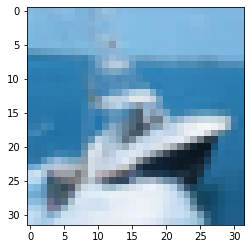

In [ ]:
plt.imshow(treinamentoX[8], cmap='binary');

In [ ]:
treinamentoX.shape

(10000, 32, 32, 3)

In [ ]:
# Convertendo valores dos pixels em float
treinamentoX = treinamentoX.astype('float32')
testeX = testeX.astype('float32')

# normalização para escala [0-1]
treinamentoX = treinamentoX / 255.0
testeX = testeX / 255.0

# transformando a variável alvo (target) para uma codificação one hot
treinamentoY = to_categorical(treinamentoY)
testeY = to_categorical(testeY)

In [ ]:
testeY[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

#### Definindo o modelo igual ao exemplo do exercício

In [ ]:
# definindo modelo
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  #O 'input_shape' só precisa ser fornecido na 1ª camada convolucional
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#### Treinando o modelo

Epoch 1/10
1250/1250 [==============================] - 46s 36ms/step - loss: 1.4814 - accuracy: 0.4695 - val_loss: 1.2974 - val_accuracy: 0.5416
Epoch 2/10
1250/1250 [==============================] - 46s 37ms/step - loss: 1.1974 - accuracy: 0.5806 - val_loss: 1.1728 - val_accuracy: 0.5918
Epoch 3/10
1250/1250 [==============================] - 43s 34ms/step - loss: 1.0758 - accuracy: 0.6230 - val_loss: 1.1033 - val_accuracy: 0.6218
Epoch 4/10
1250/1250 [==============================] - 43s 34ms/step - loss: 0.9825 - accuracy: 0.6565 - val_loss: 1.0920 - val_accuracy: 0.6249
Epoch 5/10
1250/1250 [==============================] - 44s 36ms/step - loss: 0.9017 - accuracy: 0.6816 - val_loss: 1.0396 - val_accuracy: 0.6366
Epoch 6/10
1250/1250 [==============================] - 43s 34ms/step - loss: 0.8327 - accuracy: 0.7075 - val_loss: 1.1111 - val_accuracy: 0.6224
Epoch 7/10
1250/1250 [==============================] - 43s 35ms/step - loss: 0.7677 - accuracy: 0.7278 - val_loss: 1.0575 -

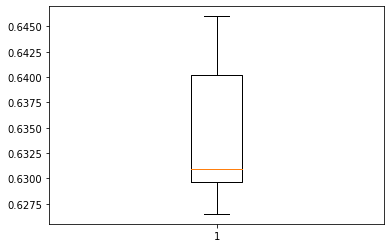

In [ ]:
scores = [] 
histories = []

# definindo a validação k-fold
lotes = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for treinamento_ix, teste_ix in lotes.split(treinamentoX):
  
  model = define_model()
  
  # recorta dados de acordo com índices da k-fold
  treinamento_data, treinamento_alvo, val_data, val_alvo = treinamentoX[treinamento_ix], treinamentoY[treinamento_ix], treinamentoX[teste_ix], treinamentoY[teste_ix]
  
  # treinamento do modelo
  history = model.fit(treinamento_data, treinamento_alvo, 
                      epochs=10, batch_size=32, 
                      validation_data=(val_data, val_alvo), 
                      verbose=1)
  
  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_alvo, verbose=0)
  print('> %.3f' % (acc * 100.0))
  
  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

**Resposta**

Quando usando o dataset cifar10 obtivemos uma rede treinada com acurácia média de 63,46%, valor significantemente abaixo da acurária do modelo treinado com os dados MNIST. Tal diferença já era esperada dado que as imagens do dataset cifar10 apresentam caracteristicas mais complexas.

**Atividade #2**

Experimente adicionar mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2) antes da camada Flatten e compare os resultados.

#### Definindo o modelo adicionando mais duas camadas convolucionais.

In [ ]:
# definindo modelo
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  #O 'input_shape' só precisa ser fornecido na 1ª camada convolucional
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))  
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))  
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#### Treinando o modelo

Epoch 1/10
1250/1250 [==============================] - 75s 57ms/step - loss: 1.5989 - accuracy: 0.4119 - val_loss: 1.3451 - val_accuracy: 0.5272
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.2177 - accuracy: 0.5660 - val_loss: 1.2502 - val_accuracy: 0.5639
Epoch 3/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.0715 - accuracy: 0.6236 - val_loss: 1.0230 - val_accuracy: 0.6449
Epoch 4/10
1250/1250 [==============================] - 66s 53ms/step - loss: 0.9713 - accuracy: 0.6589 - val_loss: 0.9782 - val_accuracy: 0.6596
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.8950 - accuracy: 0.6859 - val_loss: 0.9561 - val_accuracy: 0.6647
Epoch 6/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.8392 - accuracy: 0.7063 - val_loss: 1.0405 - val_accuracy: 0.6567
Epoch 7/10
1250/1250 [==============================] - 66s 52ms/step - loss: 0.7837 - accuracy: 0.7288 - val_loss: 0.9468 -

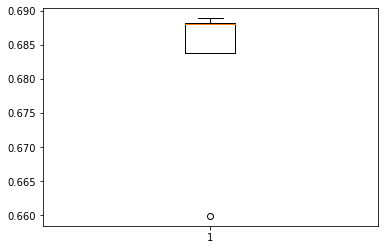

In [ ]:
scores = [] 
histories = []

# definindo a validação k-fold
lotes = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for treinamento_ix, teste_ix in lotes.split(treinamentoX):
  
  model = define_model()
  
  # recorta dados de acordo com índices da k-fold
  treinamento_data, treinamento_alvo, val_data, val_alvo = treinamentoX[treinamento_ix], treinamentoY[treinamento_ix], treinamentoX[teste_ix], treinamentoY[teste_ix]
  
  # treinamento do modelo
  history = model.fit(treinamento_data, treinamento_alvo, 
                      epochs=10, batch_size=32, 
                      validation_data=(val_data, val_alvo), 
                      verbose=1)
  
  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_alvo, verbose=0)
  print('> %.3f' % (acc * 100.0))
  
  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

**Resposta**: 

Obtivemos uma melhora significativa na acurária após adicionarmos mais duas camadas convolucionais na estrutura do modelo. A acurária subiu de 63% para 68%.

**Atividade #3**


Seguindo o modelo modificado no item anterior, experimente adicionar um Dropout de 20% após cada camada MaxPooling. Comente os resultados obtidos.

#### Definindo o modelo adicionando mais duas camadas convolucionais e camadas de Dropout.

In [ ]:
# definindo modelo
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  #O 'input_shape' só precisa ser fornecido na 1ª camada convolucional
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))  
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))  
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(.2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#### Treinando o modelo

Epoch 1/10
1250/1250 [==============================] - 73s 57ms/step - loss: 1.6870 - accuracy: 0.3735 - val_loss: 1.3540 - val_accuracy: 0.5149
Epoch 2/10
1250/1250 [==============================] - 72s 58ms/step - loss: 1.3497 - accuracy: 0.5131 - val_loss: 1.2379 - val_accuracy: 0.5684
Epoch 3/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.2158 - accuracy: 0.5642 - val_loss: 1.1337 - val_accuracy: 0.6029
Epoch 4/10
1250/1250 [==============================] - 69s 55ms/step - loss: 1.1485 - accuracy: 0.5911 - val_loss: 1.1100 - val_accuracy: 0.6112
Epoch 5/10
1250/1250 [==============================] - 70s 56ms/step - loss: 1.0878 - accuracy: 0.6138 - val_loss: 1.0242 - val_accuracy: 0.6466
Epoch 6/10
1250/1250 [==============================] - 70s 56ms/step - loss: 1.0438 - accuracy: 0.6273 - val_loss: 1.0148 - val_accuracy: 0.6474
Epoch 7/10
1250/1250 [==============================] - 70s 56ms/step - loss: 1.0065 - accuracy: 0.6430 - val_loss: 0.9444 -

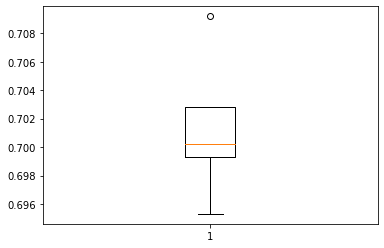

In [ ]:
scores = [] 
histories = []

# definindo a validação k-fold
lotes = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for treinamento_ix, teste_ix in lotes.split(treinamentoX):
  
  model = define_model()
  
  # recorta dados de acordo com índices da k-fold
  treinamento_data, treinamento_alvo, val_data, val_alvo = treinamentoX[treinamento_ix], treinamentoY[treinamento_ix], treinamentoX[teste_ix], treinamentoY[teste_ix]
  
  # treinamento do modelo
  history = model.fit(treinamento_data, treinamento_alvo, 
                      epochs=10, batch_size=32, 
                      validation_data=(val_data, val_alvo), 
                      verbose=1)
  
  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_alvo, verbose=0)
  print('> %.3f' % (acc * 100.0))
  
  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

**Resposta**:

A adição de 03 camadas dropout elevou a acurária do modelo para 70%, uma melhora de 2 pontos percentuais quando comparado com o modelo sem o dropout.